In [1]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import requests

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs= np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates[:5]:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
    citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

vaini to
torbay ca
cyangugu rw
vaini to
puerto ayora ec


In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

# If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

654

In [7]:
# declare and empty list
city_data = []

# print the beginning of logging
print("Beginning Data Retrieval.     ")
print("-----------------------------")

#create counters
record_count = 1
set_count = 1

Beginning Data Retrieval.     
-----------------------------


In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd08b6aa853dafd1bfeb49d39febdc52


In [17]:
#create endpoint URL with each city
city_url = url + "&q=" + "boston"
    
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dd08b6aa853dafd1bfeb49d39febdc52&q=boston


In [11]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count += 1
    
    #create endpoint URL with each city
    city_url = url + "&q=" + cities[i]

    # log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | torbay
Processing Record 3 of Set 1 | cyangugu
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | esperance
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | tuktoyaktuk
Processing Record 8 of Set 1 | paka
Processing Record 9 of Set 1 | marcona
City not found. Skipping...
Processing Record 10 of Set 1 | port elizabeth
Processing Record 11 of Set 1 | arraial do cabo
Processing Record 12 of Set 1 | lexington
Processing Record 13 of Set 1 | necochea
Processing Record 14 of Set 1 | dingle
Processing Record 15 of Set 1 | bandarbeyla
Processing Record 16 of Set 1 | mar del plata
Processing Record 17 of Set 1 | khani
Processing Record 18 of Set 1 | harper
Processing Record 19 of Set 1 | vila velha
Processing Record 20 of Set 1 | chuy
Processing Record 21 of Set 1 | rantepao
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | busselton
Processing Record 24 of Set 1 |

Processing Record 188 of Set 4 | ancud
Processing Record 189 of Set 4 | egvekinot
Processing Record 190 of Set 4 | timra
Processing Record 191 of Set 4 | lata
Processing Record 192 of Set 4 | monte patria
Processing Record 193 of Set 4 | avera
Processing Record 194 of Set 4 | bangkalan
Processing Record 195 of Set 4 | svetlaya
Processing Record 196 of Set 4 | poli
Processing Record 197 of Set 4 | lasa
Processing Record 198 of Set 4 | kununurra
Processing Record 199 of Set 4 | kruisfontein
Processing Record 200 of Set 4 | ponta do sol
Processing Record 201 of Set 4 | byron bay
Processing Record 202 of Set 4 | novaya igirma
Processing Record 203 of Set 4 | homer
Processing Record 205 of Set 5 | tulsipur
Processing Record 206 of Set 5 | tubuala
Processing Record 207 of Set 5 | nouadhibou
Processing Record 208 of Set 5 | quixada
Processing Record 209 of Set 5 | skibbereen
Processing Record 210 of Set 5 | zlobin
Processing Record 211 of Set 5 | marrakesh
Processing Record 212 of Set 5 | voi

Processing Record 378 of Set 8 | channel-port aux basques
Processing Record 379 of Set 8 | leeton
Processing Record 380 of Set 8 | geraldton
Processing Record 381 of Set 8 | ormara
Processing Record 382 of Set 8 | victoria
Processing Record 383 of Set 8 | castricum
Processing Record 384 of Set 8 | xinzhou
Processing Record 385 of Set 8 | san policarpo
Processing Record 386 of Set 8 | sarakhs
Processing Record 387 of Set 8 | klaksvik
Processing Record 388 of Set 8 | henderson
Processing Record 389 of Set 8 | springfield
Processing Record 390 of Set 8 | el wasta
City not found. Skipping...
Processing Record 391 of Set 8 | waipawa
Processing Record 392 of Set 8 | erzin
Processing Record 393 of Set 8 | hamilton
Processing Record 394 of Set 8 | maravilha
Processing Record 395 of Set 8 | seidu
Processing Record 396 of Set 8 | okakarara
Processing Record 397 of Set 8 | tomatlan
Processing Record 398 of Set 8 | ajaccio
Processing Record 399 of Set 8 | san patricio
Processing Record 400 of Set 

Processing Record 567 of Set 12 | ayia trias
Processing Record 568 of Set 12 | simpang
Processing Record 569 of Set 12 | rangapara
Processing Record 570 of Set 12 | togul
Processing Record 571 of Set 12 | viseu
Processing Record 572 of Set 12 | conakry
Processing Record 573 of Set 12 | praia da vitoria
Processing Record 574 of Set 12 | jalu
Processing Record 575 of Set 12 | barawe
City not found. Skipping...
Processing Record 576 of Set 12 | port hedland
Processing Record 577 of Set 12 | vyshhorod
Processing Record 578 of Set 12 | wexford
Processing Record 579 of Set 12 | awbari
Processing Record 580 of Set 12 | pouebo
Processing Record 581 of Set 12 | kieta
Processing Record 582 of Set 12 | phan rang
City not found. Skipping...
Processing Record 583 of Set 12 | garowe
Processing Record 584 of Set 12 | ambilobe
Processing Record 585 of Set 12 | peniche
Processing Record 586 of Set 12 | great bend
Processing Record 587 of Set 12 | ashqelon
Processing Record 588 of Set 12 | funadhoo
Proc

In [11]:
len(city_data)

552

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chany,55.3121,76.7647,25.56,98,98,13.94,RU,2021-01-26 22:11:09
1,Hithadhoo,-0.6000,73.0833,79.61,81,91,11.59,MV,2021-01-26 22:15:52
2,Airai,-8.9266,125.4092,60.04,100,99,3.06,TL,2021-01-26 22:15:52
3,Ternate,0.8000,127.4000,79.14,79,100,5.84,ID,2021-01-26 22:15:52
4,Kalengwa,-13.4659,25.0027,62.64,97,100,3.65,ZM,2021-01-26 22:15:52
5,Mataura,-46.1927,168.8643,75.00,53,100,10.00,NZ,2021-01-26 22:15:53
6,Yellowknife,62.4560,-114.3525,-11.00,64,75,9.22,CA,2021-01-26 22:15:53
7,Saint-Philippe,-21.3585,55.7679,77.00,65,0,5.75,RE,2021-01-26 22:15:53
8,Punta Arenas,-53.1500,-70.9167,50.00,46,40,28.77,CL,2021-01-26 22:15:53
9,Les Cayes,18.2000,-73.7500,78.76,66,76,6.58,HT,2021-01-26 22:15:53


In [13]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chany,RU,2021-01-26 22:11:09,55.3121,76.7647,25.56,98,98,13.94
1,Hithadhoo,MV,2021-01-26 22:15:52,-0.6000,73.0833,79.61,81,91,11.59
2,Airai,TL,2021-01-26 22:15:52,-8.9266,125.4092,60.04,100,99,3.06
3,Ternate,ID,2021-01-26 22:15:52,0.8000,127.4000,79.14,79,100,5.84
4,Kalengwa,ZM,2021-01-26 22:15:52,-13.4659,25.0027,62.64,97,100,3.65
5,Mataura,NZ,2021-01-26 22:15:53,-46.1927,168.8643,75.00,53,100,10.00
6,Yellowknife,CA,2021-01-26 22:15:53,62.4560,-114.3525,-11.00,64,75,9.22
7,Saint-Philippe,RE,2021-01-26 22:15:53,-21.3585,55.7679,77.00,65,0,5.75
8,Punta Arenas,CL,2021-01-26 22:15:53,-53.1500,-70.9167,50.00,46,40,28.77
9,Les Cayes,HT,2021-01-26 22:15:53,18.2000,-73.7500,78.76,66,76,6.58


In [14]:
# create the output file (csv)
output_data_file = "weather_data/cities.csv"

# export the city data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

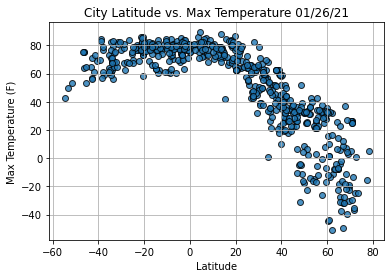

In [16]:
#import the time module
import time


# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor="black", marker="o", alpha=0.8, label="cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

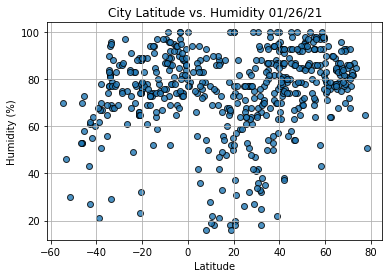

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, humidity, edgecolor="black", marker="o", alpha=0.8, label="cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

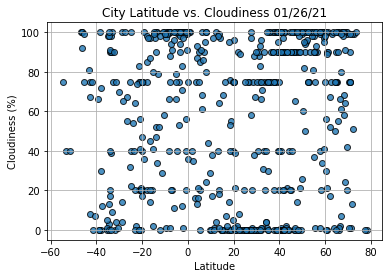

In [18]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats, cloudiness, edgecolor="black", marker="o", alpha=0.8, label="cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

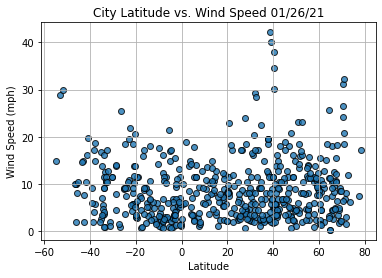

In [19]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats, wind_speed, edgecolor="black", marker="o", alpha=0.8, label="cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [24]:
from scipy.stats import linregress

In [41]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # get the equation of the line
    line_eq = "y= " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [42]:
index13 = city_data_df.loc[13]
index13

City                     Bagdarin
Country                        RU
Date          2021-01-26 22:15:54
Lat                       54.4333
Lng                         113.6
Max Temp                   -14.58
Humidity                       80
Cloudiness                    100
Wind Speed                   4.68
Name: 13, dtype: object

In [43]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3       True
4      False
       ...  
547    False
548    False
549     True
550     True
551     True
Name: Lat, Length: 552, dtype: bool

In [44]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chany,RU,2021-01-26 22:11:09,55.3121,76.7647,25.56,98,98,13.94
3,Ternate,ID,2021-01-26 22:15:52,0.8000,127.4000,79.14,79,100,5.84
6,Yellowknife,CA,2021-01-26 22:15:53,62.4560,-114.3525,-11.00,64,75,9.22
9,Les Cayes,HT,2021-01-26 22:15:53,18.2000,-73.7500,78.76,66,76,6.58
10,Thinadhoo,MV,2021-01-26 22:15:53,0.5333,72.9333,79.99,77,100,10.07
...,...,...,...,...,...,...,...,...,...
545,Bay Roberts,CA,2021-01-26 22:17:28,47.5999,-53.2648,34.00,93,100,5.01
546,Buinsk,RU,2021-01-26 22:17:28,54.9500,48.2833,21.20,93,90,13.42
549,Hirara,JP,2021-01-26 22:17:29,24.8000,125.2833,66.20,77,75,10.36
550,Tieli,CN,2021-01-26 22:17:29,46.9500,128.0500,-10.86,86,65,5.19


In [45]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

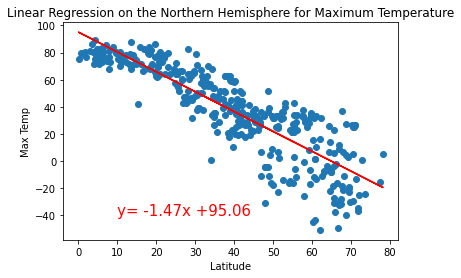

In [49]:
# Linear regression on the Northern Hemisphere Max Temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 
                       'Max Temp',(10, -40))

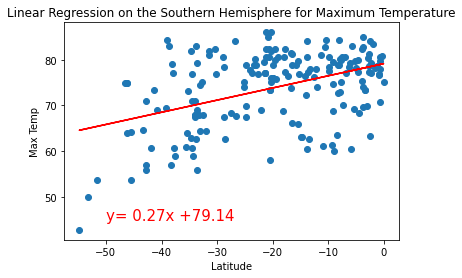

In [56]:
# Linear regression on the Southern Hemisphere Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 
                       'Max Temp',(-50, 45))

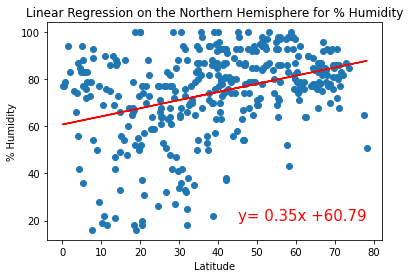

In [71]:
# Linear regression on the Northern Hemisphere Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', 
                       '% Humidity',(45, 20))

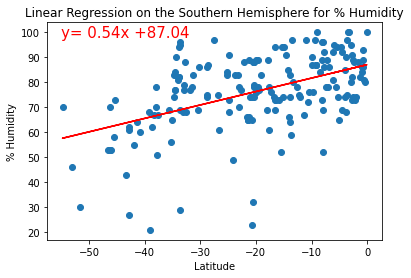

In [72]:
# Linear regression on the Southern Hemisphere Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',(-55, 98))

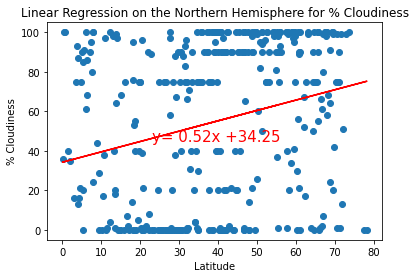

In [74]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(23, 45))

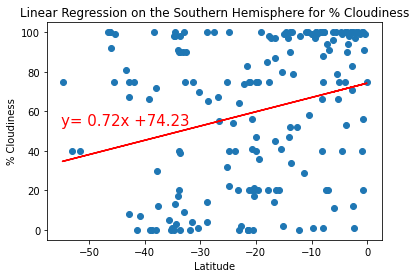

In [86]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',(-55, 53))

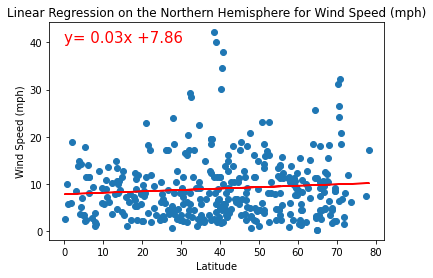

In [81]:
# Linear regression on the Northern Hemisphere wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed (mph)', 
                       'Wind Speed (mph)',(0, 40))

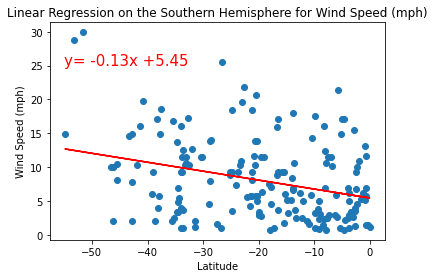

In [85]:
# Linear regression on the Northern Hemisphere wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed (mph)', 
                       'Wind Speed (mph)',(-55, 25))